Integrantes:
- Jhair
- Andre

In [1]:
import os
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu, threshold_local
from skimage.measure import label, regionprops
from skimage.transform import rescale
from skimage.exposure  import equalize_hist
from termcolor import colored

### Obtener los datos

In [2]:
!gdown 11X1hmPB-5JJZkD4zEJrb_OH__WV6KlaV

Downloading...
From: https://drive.google.com/uc?id=11X1hmPB-5JJZkD4zEJrb_OH__WV6KlaV
To: /content/imagenes_monedas.zip
100% 1.14M/1.14M [00:00<00:00, 123MB/s]


In [3]:
!unzip imagenes_monedas.zip

Archive:  imagenes_monedas.zip
replace img/S_.1.70.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: img/S_.1.70.jpeg        
  inflating: img/S_3.00.jpeg         
  inflating: img/S_.2.90.jpeg        
  inflating: img/S_.2.80.jpeg        
  inflating: img/S_.2.60.jpeg        
  inflating: img/S_.1.90.jpeg        
  inflating: img/S_.1.60.jpeg        
  inflating: img/S_.2.70.jpeg        
  inflating: img/S_.1.80.jpeg        


In [4]:
imagenes = os.listdir('img')

In [5]:
from scipy import ndimage
from skimage.segmentation import watershed
from skimage.feature import peak_local_max

### Preprocesar la imágen, umbralizar y etiquetar componentes conectados

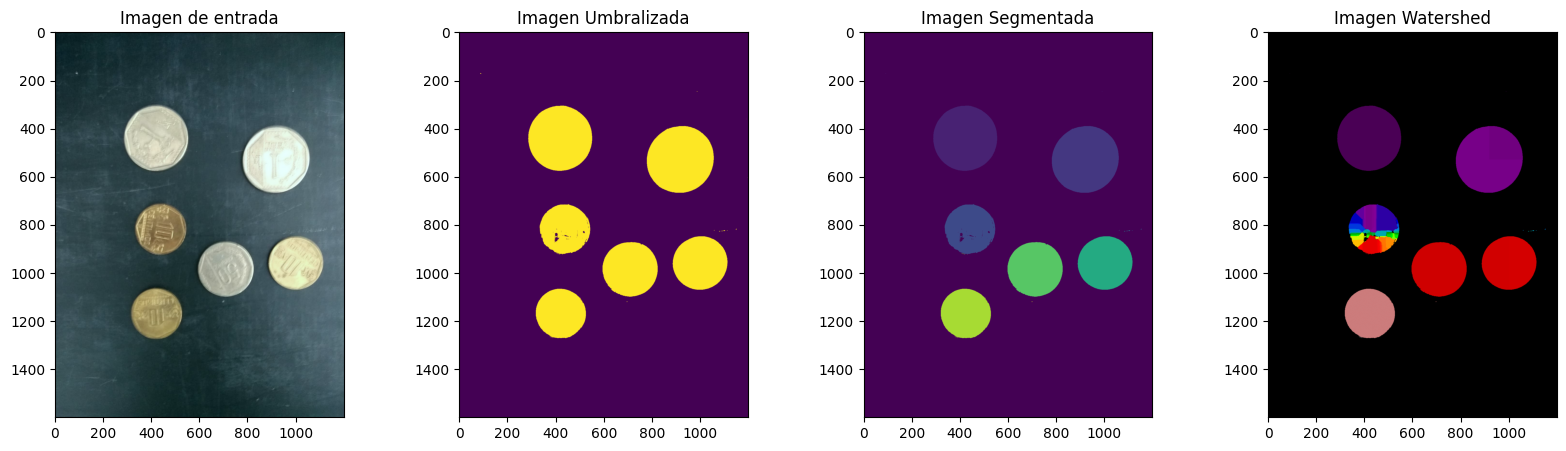

In [11]:
#@title Default title text { run: "auto" }
im_id = 1 #@param {type:"slider", min:0, max:8, step:1}
#th = 0.5 #@param {type:"slider", min:0, max:1, step:0.01}
im_filename = imagenes[im_id]
im_path = os.path.join('img',im_filename)
im = imread(im_path)
im_grayscale = im[:,:,0]
im_grayscale -= im_grayscale.min()
im_grayscale = im_grayscale/im_grayscale.max()
th = threshold_otsu(im_grayscale)
im_th = im_grayscale>th
im_labeled = label(im_th)


#Mostrar imagenes
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.title("Imagen de entrada")
plt.imshow(im)
plt.subplot(1,4,2)
plt.title("Imagen Umbralizada")
plt.imshow(im_th)
plt.subplot(1,4,3)
plt.title("Imagen Segmentada")
plt.imshow(im_labeled)
plt.subplot(1,4,4)
plt.title("Imagen Watershed")
distance = ndimage.distance_transform_edt(im_th)
coords = peak_local_max(distance, footprint=np.ones((3,3)), labels=im_th)
local_maxi = np.zeros_like(distance, dtype=bool)
if coords.size > 0:
    local_maxi[coords[:, 0], coords[:, 1]] = True
else:
    h, w = distance.shape
    local_maxi[h//2, w//2] = True
markers = ndimage.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=im_th)
plt.imshow(labels, cmap = 'nipy_spectral')


In [7]:
# se recomienda utilizar regionprops
# y utilizar area y excentricidad
# considere que las monedas están en este rango: np.pi*80**2, np.pi*150**2


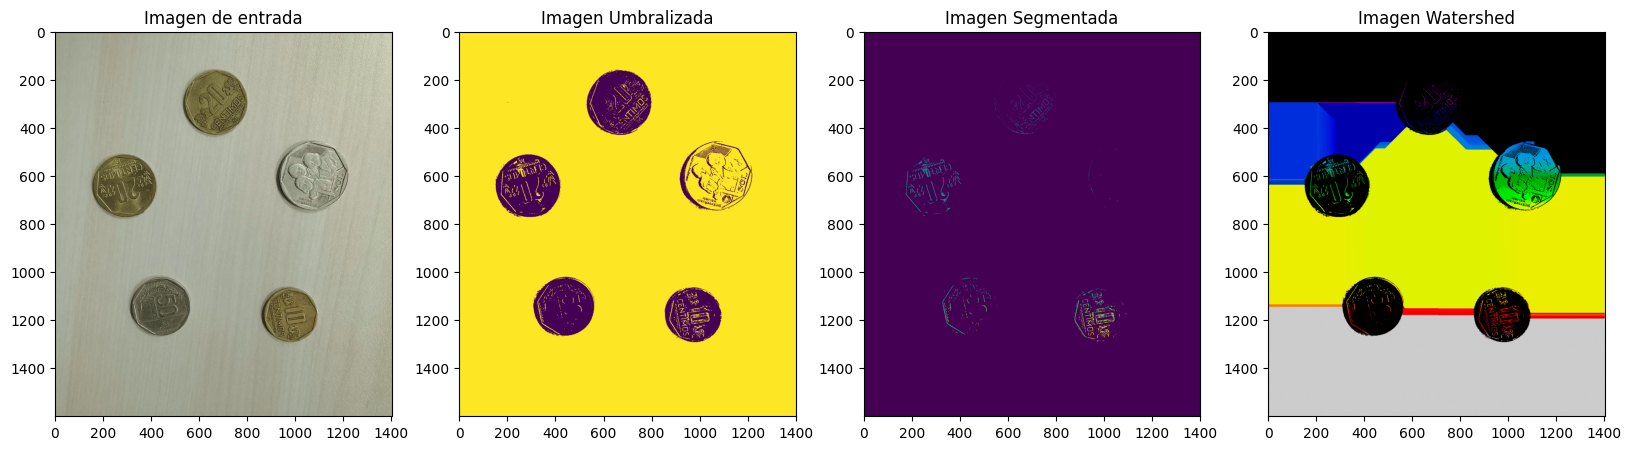

In [60]:
im_path = '/content/coins.jpg'
im = imread(im_path)

im_grayscale = im[:,:,0]
im_grayscale -= im_grayscale.min()
im_grayscale = im_grayscale/im_grayscale.max()
th = threshold_otsu(im_grayscale)
im_th = im_grayscale>th
im_labeled = label(im_th)


#Mostrar imagenes
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.title("Imagen de entrada")
plt.imshow(im)
plt.subplot(1,4,2)
plt.title("Imagen Umbralizada")
plt.imshow(im_th)
plt.subplot(1,4,3)
plt.title("Imagen Segmentada")
plt.imshow(im_labeled)
plt.subplot(1,4,4)
plt.title("Imagen Watershed")
distance = ndimage.distance_transform_edt(im_th)
coords = peak_local_max(distance, footprint=np.ones((3,3)), labels=im_th)
local_maxi = np.zeros_like(distance, dtype=bool)
if coords.size > 0:
    local_maxi[coords[:, 0], coords[:, 1]] = True
else:
    h, w = distance.shape
    local_maxi[h//2, w//2] = True
markers = ndimage.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=im_th)
plt.imshow(labels, cmap = 'nipy_spectral')

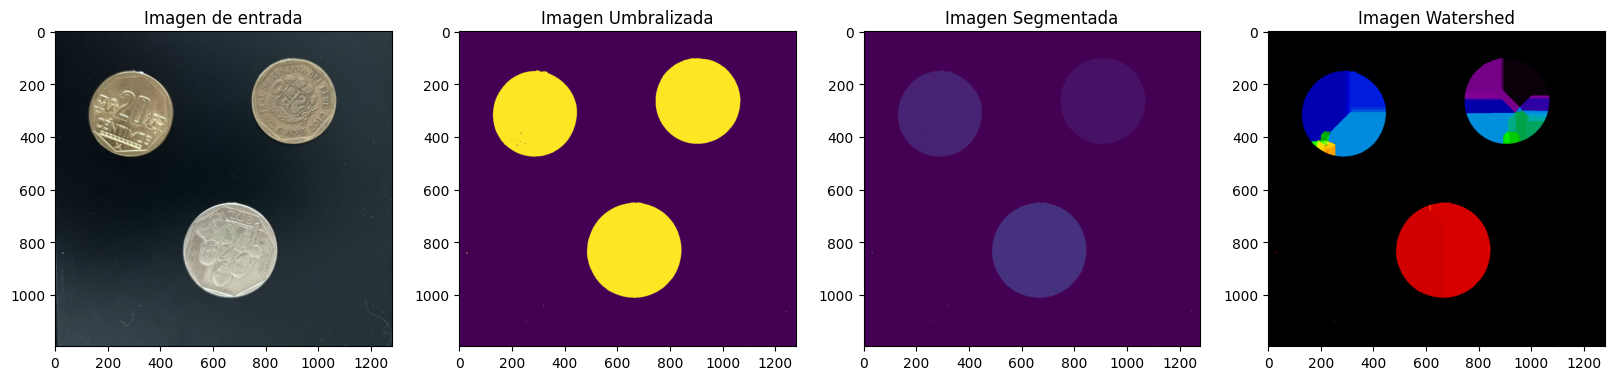

In [52]:
im_path = '/content/coins2.jpg'
im = imread(im_path)

im_grayscale = im[:,:,0]
im_grayscale -= im_grayscale.min()
im_grayscale = im_grayscale/im_grayscale.max()
th = threshold_otsu(im_grayscale)
im_th = im_grayscale>th
im_labeled = label(im_th)


#Mostrar imagenes
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.title("Imagen de entrada")
plt.imshow(im)
plt.subplot(1,4,2)
plt.title("Imagen Umbralizada")
plt.imshow(im_th)
plt.subplot(1,4,3)
plt.title("Imagen Segmentada")
plt.imshow(im_labeled)
plt.subplot(1,4,4)
plt.title("Imagen Watershed")
distance = ndimage.distance_transform_edt(im_th)
coords = peak_local_max(distance, footprint=np.ones((3,3)), labels=im_th)
local_maxi = np.zeros_like(distance, dtype=bool)
if coords.size > 0:
    local_maxi[coords[:, 0], coords[:, 1]] = True
else:
    h, w = distance.shape
    local_maxi[h//2, w//2] = True
markers = ndimage.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=im_th)
plt.imshow(labels, cmap = 'nipy_spectral')

Area: 82287.0
Procesando la region!
Excentricidad de la region es 0.14167475053020373
Paso el filtro de circularidad


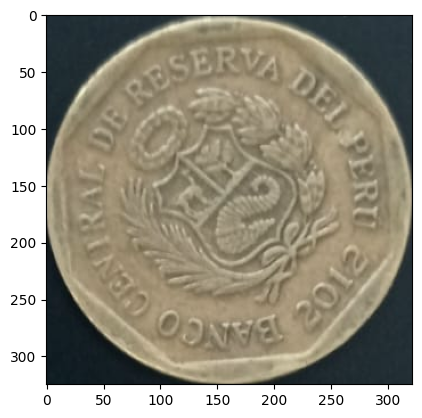

[130.40757764 123.54546584 103.88117535]
Area: 81224.0
Procesando la region!
Excentricidad de la region es 0.21649154897982628
Paso el filtro de circularidad


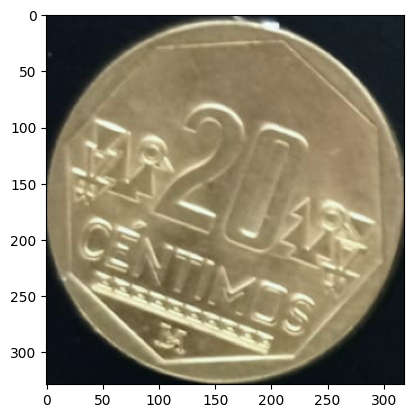

[127.90373603 118.75499995  93.19438595]
Area: 101422.0
Procesando la region!
Excentricidad de la region es 0.15715084794430764
Paso el filtro de circularidad


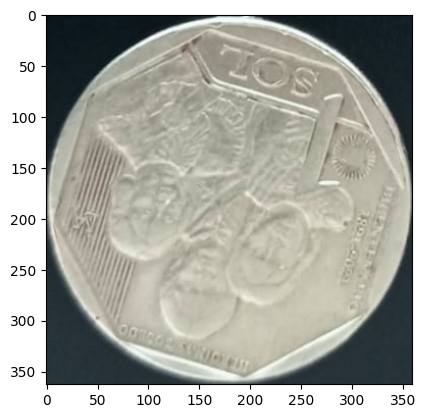

[149.64401421 150.6987116  140.4353231 ]
Area: 2.0
No pasa el filtro de area
Area: 1.0
No pasa el filtro de area
Area: 1.0
No pasa el filtro de area
Area: 1.0
No pasa el filtro de area
Area: 76.0
No pasa el filtro de area
Area: 2.0
No pasa el filtro de area
Area: 2.0
No pasa el filtro de area
Area: 8.0
No pasa el filtro de area
Area: 16.0
No pasa el filtro de area
Area: 1.0
No pasa el filtro de area
Area: 6.0
No pasa el filtro de area
Area: 3.0
No pasa el filtro de area
Area: 6.0
No pasa el filtro de area
Area: 3.0
No pasa el filtro de area
Area: 4.0
No pasa el filtro de area
Area: 1.0
No pasa el filtro de area
Area: 1.0
No pasa el filtro de area
Area: 2.0
No pasa el filtro de area
Total de monedas: 3
Monto total: S/. 1.40


In [53]:
from skimage.measure import regionprops

a_min, a_max = np.pi * 80**2, np.pi * 800**2

conteo_monedas = 0
monto_total = 0.0

valores_monedas = {
    "0.20": (80000, 90000),
    "1.00": (100000, 110000)
}

for r in regionprops(im_labeled):

    print("Area: {}".format(r.area))

    if (r.area < a_min or r.area > a_max):
        print("No pasa el filtro de area")
    else:
        print("Procesando la region!")
        print("Excentricidad de la region es {}".format(r.eccentricity))
        if r.eccentricity < 0.5:
            print("Paso el filtro de circularidad")
            conteo_monedas += 1

            valor_detectado = None
            for valor, (amin, amax) in valores_monedas.items():
                if amin <= r.area <= amax:
                    valor_detectado = float(valor)
                    monto_total += valor_detectado
                    break

            min_row, min_col, max_row, max_col = r.bbox
            plt.figure()
            plt.imshow(im[min_row:max_row, min_col:max_col])
            plt.show()
            print(im[min_row:max_row, min_col:max_col].mean(axis=0).mean(axis=0))
        else:
            print("No pasa el filtro de circularidad")

    print("=============")

print(f"Total de monedas: {conteo_monedas}")
print(f"Monto total: S/. {monto_total:.2f}")
